In [1]:
import pandas as pd
import numpy as np
import pickle
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('/content/drive/MyDrive/heart_disease/heart_disease.csv')

In [3]:
data.head()

,Unnamed: 0,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_Normal,BMI_Underweight,BMI_Overweight,BMI_Obese,HeartDisease
0,0,1,0,0,3.0,30.0,0,0,57,1,2,1,2,5.0,1,0,1,0,1,0,0,0
1,1,0,0,1,0.0,0.0,0,0,82,1,1,1,2,7.0,0,0,0,1,0,0,0,0
2,2,1,0,0,20.0,30.0,0,1,67,1,2,1,4,8.0,1,0,0,0,0,1,0,0
3,3,0,0,0,0.0,0.0,0,0,77,1,1,0,3,6.0,0,0,1,1,0,0,0,0
4,4,0,0,0,28.0,0.0,1,0,42,1,1,1,2,8.0,0,0,0,1,0,0,0,0


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
def model_eval(model, X_test, y_test):
    assert len(X_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[::, 1]
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
    plt.legend()
    plt.show()

In [6]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

In [ ]:
model_eval(log_model, X_test, y_test)

Using balanced weights

In [ ]:
log_model_bal = LogisticRegression(max_iter=500, class_weight="balanced")
log_model_bal.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced', max_iter=500)

[[66496 21192]
 [18241 69421]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     84737
           1       0.79      0.77      0.78     90613

    accuracy                           0.78    175350
   macro avg       0.78      0.78      0.78    175350
weighted avg       0.78      0.78      0.78    175350



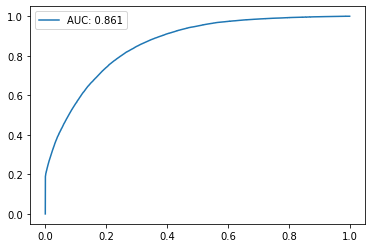

In [ ]:
model_eval(log_model_bal, X_test, y_test)

In [ ]:
SAVE_PATH='/content/drive/MyDrive/heart_disease/logistic.pkl'
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(log_model_bal, pickle_out)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

[[75833 11855]
 [ 8464 79198]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     84297
           1       0.90      0.87      0.89     91053

    accuracy                           0.88    175350
   macro avg       0.88      0.88      0.88    175350
weighted avg       0.88      0.88      0.88    175350



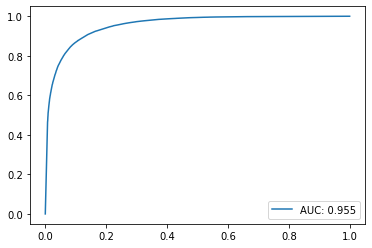

None


In [ ]:
print(model_eval(rf_model, X_test, y_test))

In [ ]:
SAVE_PATH='/content/drive/MyDrive/heart_disease/random_forest.pkl'
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(rf_model, pickle_out)

[[56644 31044]
 [17005 70657]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.70     73649
           1       0.81      0.69      0.75    101701

    accuracy                           0.73    175350
   macro avg       0.73      0.73      0.72    175350
weighted avg       0.74      0.73      0.73    175350



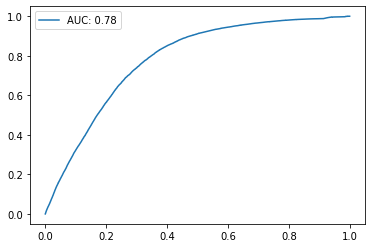

None


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
print(model_eval(gnb, X_test, y_test))

In [22]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='dart',n_estimators=500,bagging_fraction=0.3,learning_rate=0.3,feature_fraction=0.3)
clf.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.3, boosting_type='dart', feature_fraction=0.3,
               learning_rate=0.3, n_estimators=500)

[[75033 12655]
 [14123 73539]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     89156
           1       0.84      0.85      0.85     86194

    accuracy                           0.85    175350
   macro avg       0.85      0.85      0.85    175350
weighted avg       0.85      0.85      0.85    175350



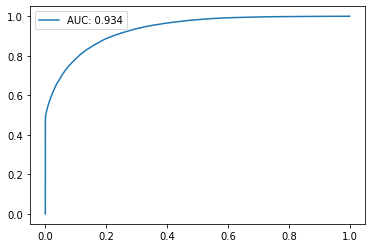

None


In [23]:
print(model_eval(clf, X_test, y_test))

In [19]:
SAVE_PATH='/content/drive/MyDrive/heart_disease/lgb.pkl'
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(clf, pickle_out)

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
print(model_eval(clf, X_test, y_test))